In [1]:
using Plots;
include("../AudioNMF.jl");
using .AudioNMF

In [2]:
## This many samples will result in a V matrix of size (256)x(2^18)
subrange = 1 : (156.5175 * (2^18))
filename = "../data/water.wav"
V, = audio_to_V(filename, subrange);

In [3]:
# k : number of components
# n : number of sequences

k_list = [16,32,64,128,256];
n_list = 2 .^[12,14,16,17,18]
compile_time = @elapsed W,H = nmf(zeros(10),2,1);
elapsed_time = zeros(length(k_list), length(n_list));

for (i_k, k) in enumerate(k_list), (i_n, n) in enumerate(n_list)
    elapsed_time[i_k,i_n] = @elapsed W, H = nmf(V[:,1:n],k,1000);
end

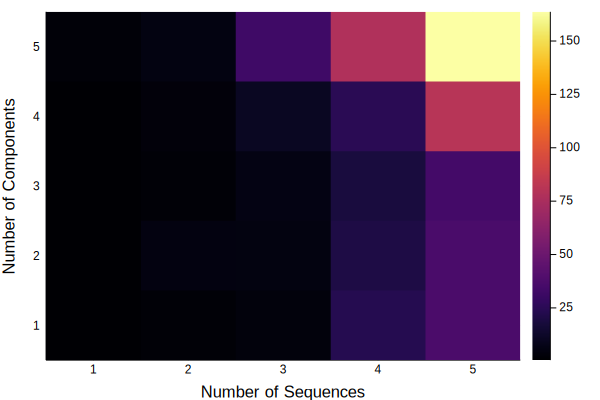

In [4]:
fig = heatmap(elapsed_time);
xlabel!(fig,"Number of Sequences")
ylabel!(fig,"Number of Components")

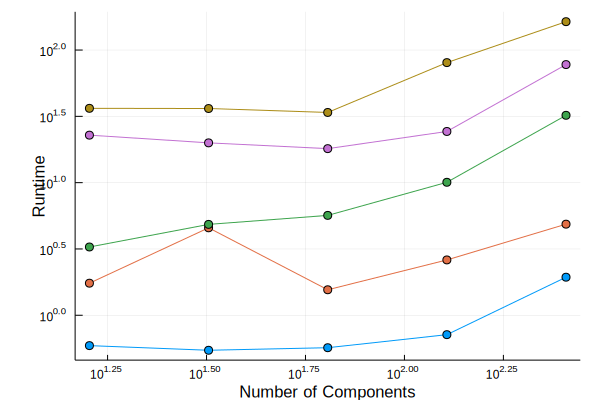

In [5]:
fig = plot(k_list, elapsed_time, markershape=:circle, xaxis=:log, yaxis=:log, legend=:none)
xlabel!(fig,"Number of Components")
ylabel!(fig,"Runtime")

In [6]:
print("compile time: ", compile_time, "\n")
elapsed_time

compile time: 11.523689727


5×5 Array{Float64,2}:
 0.590277  1.74518   3.27237  22.8143   36.347 
 0.54452   4.56507   4.84531  19.9555   36.2281
 0.569222  1.55686   5.66417  18.0513   33.8381
 0.714019  2.61392  10.0636   24.3224   80.4025
 1.93646   4.86344  32.196    77.6973  163.678 